*parcours en largeur - M. Liedloff, février 2018*

# Consignes

- sur Celene, téléchargez les fichiers indiqués
- ouvrir un `terminal`, se déplacer dans le dossier où les fichiers ont été téléchargé (commande `cd`)
- tapez dans le terminal la commande : `jupyter notebook`
- ouvrir le fichier .pynb

# Manipulation de graphes et parcours en largeur

Nous utilisons la syntaxe suivante, à base de dictionnaires et de listes, pour définir un graphe en Python : 

In [1]:
G = {
    "a": ["b"],
    "b": ["a", "c", "d"],
    "c": ["b", "d"],
    "d": ["b", "c", "e"],
    "e": ["d"]
}

Ainsi, une fonction qui parcourt toutes les arêtes d'un graphe s'écrit simplement: 

In [2]:
def AfficherAretes(G):
    for u in G:
        for v in G[u]:
            print("Arête {%s,%s}" % (u,v))

In [3]:
AfficherAretes(G)

Arête {a,b}
Arête {b,a}
Arête {b,c}
Arête {b,d}
Arête {e,d}
Arête {c,b}
Arête {c,d}
Arête {d,b}
Arête {d,c}
Arête {d,e}


Il est également possible d'afficher un graphe en utilisant [GraphViz](https://www.graphviz.org/) ([lien vers la documentation](http://graphviz.readthedocs.io/en/stable/index.html)).
Si le code ci-dessous ne fonctionne pas sur votre machine, cela n'empêchera pas le bon déroulement de la suite du TP. Cela indique seulement que la librairie graphviz n'est pas installée.

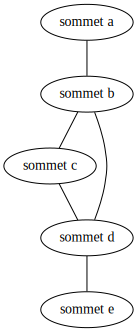

In [4]:
from graphviz import Graph
dot = Graph()

for v in G:
    dot.node(v, "sommet "+v)

for v in G:
    for u in G[v]:
        if v<=u:
            dot.edge(v, u)
dot

Petite astuce: les **[dictionnaires](https://docs.python.org/3.5/tutorial/datastructures.html#dictionaries)** sont très utiles pour définir des états (ou d'autres choses). On peut définir une variable etats et s'en servir plus tard de la façon suivante :

```
etats = {}
...
etats[u] = "non atteint"
...
if etats[u]=="non atteint":
etats[u] = "atteint"
```

On peut aussi utiliser des **[ensembles](https://docs.python.org/3.5/tutorial/datastructures.html#sets)** :
```
sommetsAtteints = set()
...
sommetsAtteints.add(u)
...
if u not in sommetsAtteints:
# do something
```

Une **file FIFO** peut être implémentée en utilisant une *liste*.
On y ajoute un élément avec la méthode `append`. Un élément est extrait avec la méthode `pop`. Voici un exemple pour manipuler une liste comme une file FIFO. Prenez le temps de lire ce code et de regarder le résultat produit.

In [5]:
def estvide(F):
    """ cette fonction retourne True si la liste est vide, sinon elle retourne False"""
    if F:
        return False
    else:
        return True

F = ["élément A"] # pour initialiser une file vide : F = []
F.append("élément B") # ajoute un élément
print(F)
e = F.pop(0) # défile un élément
print(e)
F.append("élément C")
print(F)

print("longueur de la liste", len(F))

# tant que la file n'est pas vide, on défile un élément et on l'affiche :
while F:
    print(F.pop(0))

print(estvide(F))

['élément A', 'élément B']
élément A
['élément B', 'élément C']
longueur de la liste 2
élément B
élément C
True


# Parcours en largeur

## question 1
Écrire une fonction `ParcoursLargeur(G,s)` de parcours en largeur, la mettre au point, et la tester sur le graphe `G` précédent (ou un autre graphe de votre choix). Cette fonction attend en entrée un graphe `G` et un sommet `s` à partir duquel le graphe est exploré.

Pour le moment, vous n'avez pas besoin de gérer la distance `d` et le père `pere` de chaque sommet.

![algorithme du parcours en largeur](http://www.univ-orleans.fr/lifo/Members/Mathieu.Liedloff/temp/ACSD/TP1/parcourslargeur.png)

In [9]:
def ParcoursLargeur(G,s):
    pass # l'instruction pass ne fait rien. Vous devez supprimer cette ligne et codez !
    etat = {}
    pere = {}
    d = {}
    for sommetU in G :
        etat[sommetU] = "non atteint"
        d[sommetU] = -1
        pere[sommetU] = None
    etat[s] = "atteint"
    d[s] = 0
    pere[s] = None
    F = [s]
    while ( len(F) != 0 ) : #(estvide(F)):
        sommetU = F.pop(0)
        for sommetV in G[sommetU]:
            if etat[sommetV] == "non atteint" :
                etat[sommetV] = "atteint"
                d[sommetV] = d[sommetU] + 1
                pere[sommetV] = sommetU
                F.append(sommetV)
        etat[sommetU] = "traité"

In [10]:
G = {
    "a": ["b"],
    "b": ["a", "c", "d"],
    "c": ["b", "d"],
    "d": ["b", "c", "e"],
    "e": ["d"]
}
ParcoursLargeur(G,'a')

{'b': 'traité', 'a': 'traité', 'e': 'traité', 'c': 'traité', 'd': 'traité'} {'b': 1, 'a': 0, 'e': 3, 'c': 2, 'd': 2} {'b': 'a', 'a': None, 'e': 'd', 'c': 'b', 'd': 'b'}


## question 2
Un cookie a été caché sur l'un des sommets d'un graphe. Vous ne connaissez pas ce graphe (il est stocké sur un serveur), mais vous disposez des fonctions suivantes :
- **`getAVertex()`** retourne un sommet du graphe à partir duquel vous commencez l'exploration du graphe.
- **`getNeighbors(u)`** retourne la liste des voisins d'un sommet `u`.
- **`Cookie(u)`** retourne True si et seulement si un cookie se trouve sur le sommet `u`.

Pour vous connectez au serveur contenant le graphe, nous importons quelques fonctions puis nous utilisons la fonction connectSocket: 

In [8]:
from utils import connectSocket, closeSocket, sendcmd, recvcmd
from utils import getNeighbors, getAVertex, Cookie, CookieDistance

connectSocket("uomobile.univ-orleans.fr", 6667)

Attention: le graphe change à chaque connexion, sinon ce serait trop facile ! Il faut donc que votre algorithme de parcours soit vraiment au point.

Voici un petit exemple d'utilisation de ces fonctions:

In [9]:
sommetInitial = getAVertex()
print("Le sommet initial est", sommetInitial)

for v in getNeighbors(sommetInitial):
    print("Le sommet",sommetInitial, "est voisin avec", v)

print("Le sommet ",sommetInitial, "contient-il un cookie ?", Cookie(sommetInitial))

>>> GetStartingVertex 
<<< StartingVertex AI570
Le sommet initial est AI570
>>> GetNeighbor AI570
<<< Neighborhood TU630#GM548#SW016#XF766#CA067#YM557
Le sommet AI570 est voisin avec TU630
Le sommet AI570 est voisin avec GM548
Le sommet AI570 est voisin avec SW016
Le sommet AI570 est voisin avec XF766
Le sommet AI570 est voisin avec CA067
Le sommet AI570 est voisin avec YM557
>>> Cookie? AI570
<<< Cookie No
Le sommet  AI570 contient-il un cookie ? False


Les lignes avec des chevrons `>>>` et `<<<` sont simplement les messages échangés entre votre machine et le serveur. Vous pouvez les ignorer ...

Il faut maintenant adaptez votre algorithme de parcours en largeur pour écrire une fonction **`ParcoursLargeurNetwork()`** qui parcourt le graphe du serveur et affiche le nom du sommet contenant le cookie. 
**Saurez-vous trouver le cookie dans le graphe ?**

In [11]:
def ParcoursLargeurNetwork():
    s = getAVertex()
    atteint = {s} #Enssemble des sommets atteints
    
    F = [s]
    while F:
        u = F.pop(0)
        if Cookie(u):
            print("Cookie trouvé !")
            return u
        
        for v in getNeighbors(u):
            if v not in atteint:
                atteint.add(v)
                F.append(v)

In [11]:
coo = ParcoursLargeurNetwork()
print("Le cookie est sur le sommet", coo)

>>> GetStartingVertex 
<<< StartingVertex AI570
Le cookie est sur le sommet None


## question 3

Déterminez la distance entre le sommet retourné par `getAVertex()` et le sommet contenant le cookie. Pour vérifier votre résultat, utilisez la fonction **`CookieDistance(r)`** qui attend en paramètre la distance `r` que vous avez calculée et retourne `True` si et seulement si votre résultat est correct. 

In [12]:
(coo, dist) = ParcoursLargeurNetwork()
print("Le cookie est sur le sommet", coo, Cookie(coo) )
print("Le cookie est à distance", dist, CookieDistance(dist))

## question 4
Construire un plus court chemin du sommet de départ retourné par `getAVertex()` vers le sommet contenant le cookie.